In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')

In [5]:
data = pd.read_csv("/content/drive/My Drive/Machine Learning/train_data.csv")


In [6]:
test = pd.read_csv("/content/drive/My Drive/Machine Learning/test_data.csv")

In [ ]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
data.shape

(318438, 18)

In [ ]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


**Data Cleaning**

In [ ]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
data['Bed Grade'].isnull().sum()

113

In [ ]:
data['Bed Grade'].replace(np.NaN , data['Bed Grade'].mean()).head(15)

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
5     2.0
6     3.0
7     3.0
8     4.0
9     3.0
10    2.0
11    1.0
12    3.0
13    3.0
14    3.0
Name: Bed Grade, dtype: float64

In [ ]:
data['City_Code_Patient'].replace(np.NaN , data['City_Code_Patient'].mean()).head(15)

0     7.0
1     7.0
2     7.0
3     7.0
4     7.0
5     7.0
6     7.0
7     7.0
8     7.0
9     7.0
10    7.0
11    7.0
12    7.0
13    7.0
14    8.0
Name: City_Code_Patient, dtype: float64

**VISUALIZATION**

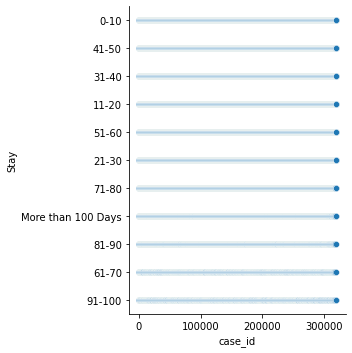

In [ ]:
sns.relplot(x='case_id', y='Stay', data=data)

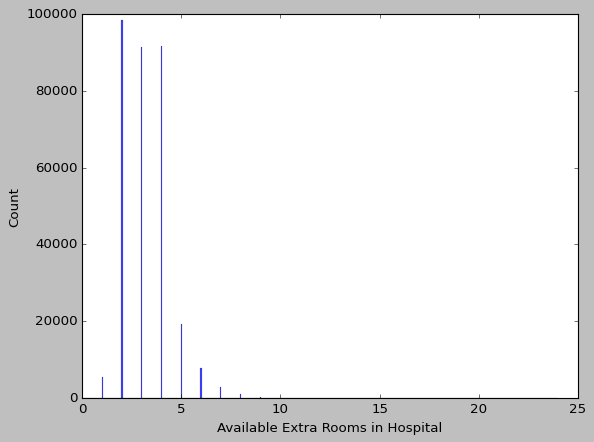

In [ ]:
sns.histplot(data["Available Extra Rooms in Hospital"])

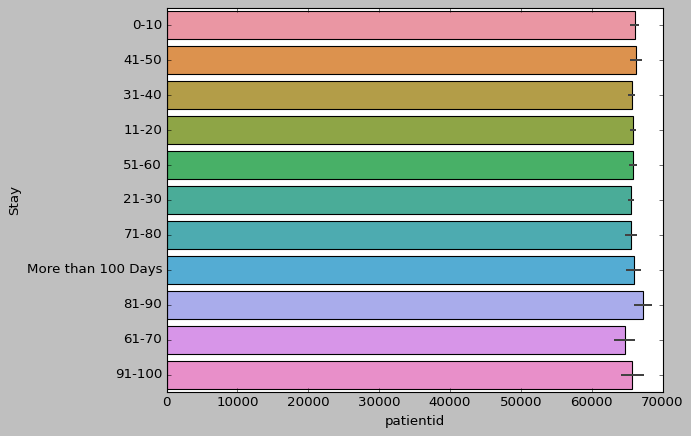

In [ ]:
sns.barplot(x="patientid", y="Stay",data=data)

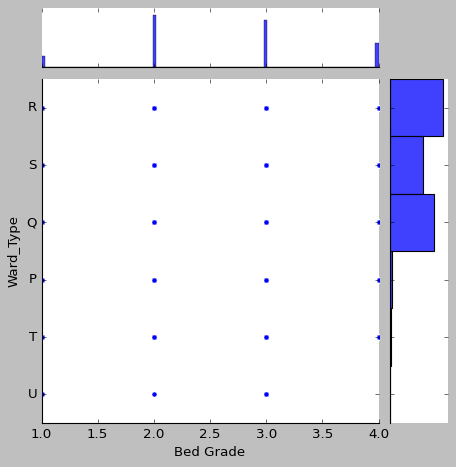

In [ ]:
sns.jointplot(x="Bed Grade",y="Ward_Type",data=data)

**MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
x= data.iloc[:,0:6]
y= data.iloc[:,15:18]
x

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital
0,1,8,c,3,Z,3
1,2,2,c,5,Z,2
2,3,10,e,1,X,2
3,4,26,b,2,Y,2
4,5,26,b,2,Y,2
...,...,...,...,...,...,...
318433,318434,6,a,6,X,3
318434,318435,24,a,1,X,2
318435,318436,7,a,4,X,3
318436,318437,11,b,2,Y,3


In [ ]:
y

,Age,Admission_Deposit,Stay
0,51-60,4911.0,0-10
1,51-60,5954.0,41-50
2,51-60,4745.0,31-40
3,51-60,7272.0,41-50
4,51-60,5558.0,41-50
...,...,...,...
318433,41-50,4144.0,11-20
318434,81-90,6699.0,31-40
318435,71-80,4235.0,11-20
318436,11-20,3761.0,11-20


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(159219, 6)
(159219, 6)


In [8]:
for i in data.columns:
    print(i, ':', data[i].nunique())

case_id : 318438
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 18
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 92017
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 28
Age : 10
Admission_Deposit : 7300
Stay : 11


In [9]:
for i in test.columns:
    print(i, ':', test[i].nunique())

case_id : 137057
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 15
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 39607
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 27
Age : 10
Admission_Deposit : 6609


**DATA PREPARATION**

In [10]:
data['Bed Grade'].fillna(data['Bed Grade'].mode()[0], inplace = True)
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)

In [12]:
data['City_Code_Patient'].fillna(data['City_Code_Patient'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Stay'] = le.fit_transform(data['Stay'].astype('str'))

In [14]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [15]:
test['Stay'] = -1
df = pd.concat([data, test])
df.shape

(455495, 18)

In [16]:
#Label Encoding all the columns in Train and test datasets
for i in ['Hospital_type_code', 'Hospital_region_code', 'Department',
          'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

In [17]:
#Spearating Train and Test Datasets
data = df[df['Stay']!=-1]
test = df[df['Stay']==-1]

**FEATURE ENGINEERING**

In [18]:
def get_countid_enocde(data, test, cols, name):
  temp = data.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  temp2 = test.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  data = pd.merge(data, temp, how='left', on= cols)
  test = pd.merge(test,temp2, how='left', on= cols)
  data[name] = data[name].astype('float')
  test[name] = test[name].astype('float')
  data[name].fillna(np.median(temp[name]), inplace = True)
  test[name].fillna(np.median(temp2[name]), inplace = True)
  return data, test

In [19]:
data, test = get_countid_enocde(data, test, ['patientid'], name = 'count_id_patient')
data, test = get_countid_enocde(data, test, 
                                 ['patientid', 'Hospital_region_code'], name = 'count_id_patient_hospitalCode')
data, test = get_countid_enocde(data, test, 
                                 ['patientid', 'Ward_Facility_Code'], name = 'count_id_patient_wardfacilityCode')

In [20]:
# Droping duplicate columns
test1 = test.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = data.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [21]:
# Splitting train data for Naive Bayes and XGBoost
X1 = train1.drop('Stay', axis =1)
y1 = train1['Stay']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.20, random_state =100)

**MODEL**

In [22]:
from sklearn.naive_bayes import GaussianNB
target = y_train.values
features = X_train.values
classifier_nb = GaussianNB()
model_nb = classifier_nb.fit(features, target)

In [23]:
prediction_nb = model_nb.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score_nb = accuracy_score(prediction_nb,y_test)
print("Acurracy:", acc_score_nb*100)

Acurracy: 34.55439015199096


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [25]:
# Segregation of features and target variable
X = data.drop('Stay', axis =1)
y = data['Stay']
print(X.columns)
z = test.drop('Stay', axis = 1)
print(z.columns)

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'count_id_patient',
       'count_id_patient_hospitalCode', 'count_id_patient_wardfacilityCode'],
      dtype='object')
Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'count_id_patient',
       'count_id_patient_hospitalCode', 'count_id_patient_wardfacilityCode'],
      dtype='object')


In [26]:
# Data Scaling
from sklearn import preprocessing
X_scale = preprocessing.scale(X)
X_scale.shape

(318438, 20)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size =0.20, random_state =100)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [29]:
from keras.utils import to_categorical
#Sparse Matrix
a = to_categorical(y_train)
b = to_categorical(y_test)

In [30]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (254750, 20))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 254750, 64)        1344      
                                                                 
 dense_1 (Dense)             (None, 254750, 128)       8320      
                                                                 
 dense_2 (Dense)             (None, 254750, 256)       33024     
                                                                 
 dense_3 (Dense)             (None, 254750, 512)       131584    
                                                                 
 dense_4 (Dense)             (None, 254750, 512)       262656    
                                                                 
 dense_5 (Dense)             (None, 254750, 11)        5643      
                                                                 
Total params: 442,571
Trainable params: 442,571
Non-trai

In [32]:
model.compile(optimizer= 'SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

**PREDICTION**

In [33]:
# Naive Bayes
pred_nb = classifier_nb.predict(test1.iloc[:,1:])
result_nb = pd.DataFrame(pred_nb, columns=['Stay'])
result_nb['case_id'] = test1['case_id']
result_nb = result_nb[['case_id', 'Stay']]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [34]:
result_nb['Stay'] = result_nb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_nb.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,31-40


In [35]:
# Neural Network
test_scale = preprocessing.scale(z)
test_scale.shape

(137057, 20)

In [36]:
# Naive Bayes
print(result_nb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   2598
11-20                 26827
21-30                 72206
31-40                 15639
41-50                   469
51-60                 13651
61-70                    92
71-80                   955
81-90                   296
91-100                    2
More than 100 Days     4322
Name: case_id, dtype: int64
